In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter
import pickle
from scipy.signal import convolve


# load ACM simulations

In [2]:
# load simulations 

speeds = [0.27,0.81,1.62,3.24,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#speeds = [0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

data = []
cell = 300
for s in speeds: 
    fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/ACM/ACM_slow/w_GC/w_GC_0.0/smooth_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        params = pickle.load(handle)

    duration = params['duration']
    dt = params['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = (np.arange(0,duration,dt) - (params['spacing']*cell)/params['speed'])*1000#+45

    data.append([time,out['RG'][cell]])

    if s == 0.81:
        outd = out




# load RAM simulations

In [3]:
data3 = []
cell = 150

for s in speeds: 
    fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted/noGCGainControl/wBA/wBA_31.0/smooth_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        paramsi = pickle.load(handle)

    duration = paramsi['duration']
    dt = paramsi['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = (np.arange(0,duration,dt) - (paramsi['spacing']*cell)/paramsi['speed'])*1000#+45
    data3.append([time,out['RG'][:]])

    if s == 0.81:
        outd3 = out


# load RAM simulations linear

In [4]:
data4 = []
cell = 150

for s in speeds: 
    print(s)
    fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted_linear/wBA/wBA_31.0/smooth_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        paramsi = pickle.load(handle)

    duration = paramsi['duration']
    dt = paramsi['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = (np.arange(0,duration,dt) - (paramsi['spacing']*cell)/paramsi['speed'])*1000#+45
    data4.append([time,out['RG'][:]])

    if s == 0.81:
        outd4 = out

0.27
0.81
1.62
3.24
0.1
0.2
0.4
0.5
0.6
0.7
0.8
0.9
1.0


# load pooling simulations

In [5]:
# load simulations without mechanism

cell = 300
s = 0.81
fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/ACM/Pooling_slow/w_GC/w_GC_0.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outdp = pickle.load(handle)    
    
with open(f'{fp}/params', 'rb') as handle:
    params = pickle.load(handle)

duration = params['duration']
dt = params['dt']
time = (np.arange(0,duration,dt) - (params['spacing']*cell)/params['speed'])*1000#+45

fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted/noGCGainControl/wBA/wBA_0.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outdp3 = pickle.load(handle)   


fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted_linear/wBA/wBA_0.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outdp4 = pickle.load(handle)   

# fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted_mono_linear/wBA/wBA_0.0/smooth_{s}'
# with open(f'{fp}/out', 'rb') as handle:
#     outdp5 = pickle.load(handle)   


# Figure Parameter

In [6]:
fontsize_legend = 20
fontsize_labels = 25
fontsize_panellabel = 30
fontsize_ticks = 20
lw = 4
ms = 60

figsize_ratio = 3


save = True
save_name = "Figure 1"
show = True
image_format = "png"
dpi = 300


# compare GC firing rates for different speeds ACM and RAM

(-1000.0, 1000.0)

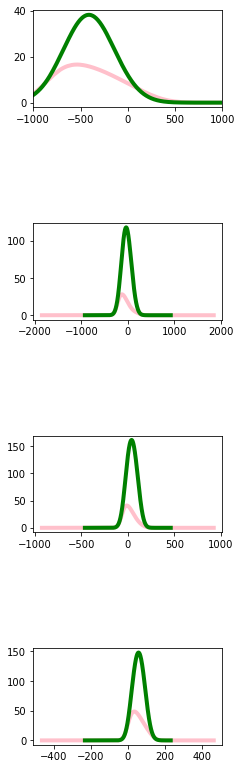

In [7]:

#initialize figure
nrows = 4
ncols = 1

fig = plt.figure(figsize=(ncols*figsize_ratio,nrows*figsize_ratio))
fig.patch.set_facecolor('white')


gs = fig.add_gridspec(nrows,ncols)
fig.tight_layout()



fig.subplots_adjust(top=0.9,
                    bottom=0.05,
                    left=0.1,
                    right=0.975,
                    hspace=1.2,
                    wspace=1.5)



# ACM and RAM
ax = []
for i in range(nrows) : 
    ax.append(fig.add_subplot(gs[i]))


ax[0].plot(data[0][0],data[0][1], color = 'pink', linewidth = 4, label = 'ACM reproduction')
ax[1].plot(data[1][0],data[1][1], color = 'pink', linewidth = 4, label = 'ACM reproduction')
ax[2].plot(data[2][0],data[2][1], color = 'pink', linewidth = 4, label = 'ACM reproduction')
ax[3].plot(data[3][0],data[3][1], color = 'pink', linewidth = 4, label = 'ACM reproduction')

ax[0].plot(data3[0][0],data3[0][1], color = 'green', linewidth = 4, label = 'RAM', linestyle = '-')
ax[1].plot(data3[1][0],data3[1][1], color = 'green', linewidth = 4, label = 'RAM', linestyle = '-')
ax[2].plot(data3[2][0],data3[2][1], color = 'green', linewidth = 4, label = 'RAM', linestyle = '-')
ax[3].plot(data3[3][0],data3[3][1], color = 'green', linewidth = 4, label = 'RAM', linestyle = '-')


ax[0].set_xlim(-1000,1000)

# compare ACM and RAM in detail, same mechanism 

(-500.0, 500.0)

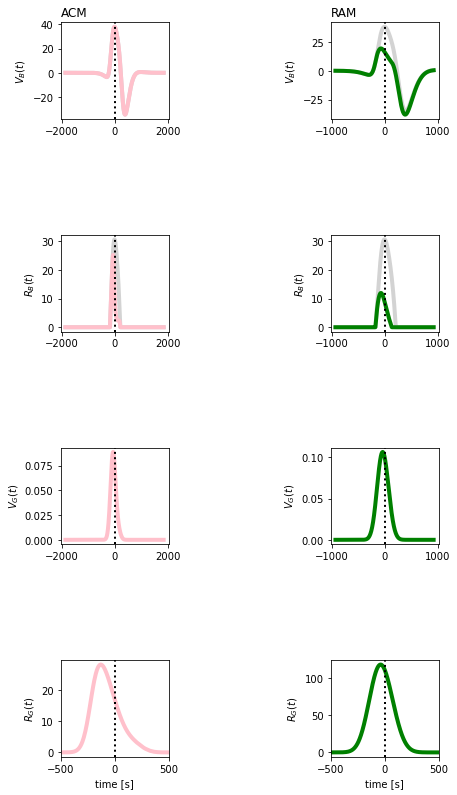

In [8]:
nrows = 4
ncols = 2

fig,ax = plt.subplots(nrows,ncols,figsize=(ncols*figsize_ratio,nrows*figsize_ratio))
fig.patch.set_facecolor('white')


gs = fig.add_gridspec(nrows,ncols)
fig.tight_layout()


# TODO adjust
fig.subplots_adjust(top=0.9,
                    bottom=0.05,
                    left=0.1,
                    right=0.975,
                    hspace=1.2,
                    wspace=1.5)



# TODO remove axis 



c1 = 'pink'
c2 = 'green'


ax[0,0].set_title('ACM', loc = 'left')
ax[0,0].set_title('ACM', loc = 'left')
ax[0,0].set_title('ACM', loc = 'left')
ax[0,0].set_title('ACM', loc = 'left')

ax[0,0].set_ylabel('$V_{B}(t)$')
ax[0,0].plot(data[1][0],outdp['VB'][300,:], color = 'lightgrey', linewidth = lw)
ax[0,0].plot(data[1][0],outd['VB'][300,:], color = c1, linewidth = lw)

ax[1,0].set_ylabel('$R_{B}(t)$')
ax[1,0].plot(data[1][0],outdp['RB'][300,:], color = 'lightgrey', linewidth = lw)
ax[1,0].plot(data[1][0], outd['RB'][300,:], color = c1, linewidth = lw)

#ax[2,0].plot(data[1][0],outd['RB'][300,:]- outdp['RB'][300,:], color = 'green', linestyle = ':')

ax[2,0].set_ylabel('$V_{G}(t)$')
#ax[2,0].plot(data[1][0],outdp['VG'][300,:], color = 'grey')
ax[2,0].plot(data[1][0], outd['VG'][300,:], color = c1, linewidth = lw)

ax[3,0].set_ylabel('$R_{G}(t)$')
#ax[3,0].plot(data[1][0],outdp['RG'][300,:], color = 'grey')
ax[3,0].plot(data[1][0], outd['RG'][300,:], color = c1, linewidth = lw)



ax[0,1].set_title('RAM', loc = 'left')

ax[0,1].set_ylabel('$V_{B}(t)$')
ax[0,1].plot(data3[1][0],outdp3['VB'][50,:], color = 'lightgrey', linewidth = lw)
ax[0,1].plot(data3[1][0],outd3['VB'][50,:], color = c2, linewidth = lw)

ax[1,1].set_ylabel('$R_{B}(t)$')
ax[1,1].plot(data3[1][0],outdp3['RB'][50,:], color = 'lightgrey', linewidth = lw)
ax[1,1].plot(data3[1][0], outd3['RB'][50,:], color = c2, linewidth = lw)

#ax[2,1].plot(data[1][0],outd3['RB'][300,:]- outdp3['RB'][300,:], color = 'cyan', linestyle = ':')

ax[2,1].set_ylabel('$V_{G}(t)$')
#ax[2,1].plot(data[1][0],outdp3['VG'][300,:], color = 'grey')
ax[2,1].plot(data3[1][0],outd3['VG'][:], color = c2, linewidth = lw)

ax[3,1].set_ylabel('$R_{G}(t)$')
#ax[3,1].plot(data[1][0],outdp3['RG'][300,:], color = 'grey')
ax[3,1].plot(data3[1][0], outd3['RG'][:], color = c2, linewidth = lw)


ax[0,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[1,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[2,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[3,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )


ax[0,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[1,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[2,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[3,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )


ax[-1,0].set_xlabel ('time [s]')
ax[-1,1].set_xlabel ('time [s]')
ax[-1,0].set_xlim(-500,500)
ax[-1,1].set_xlim(-500,500)

# RAM can have early anticipation onset via amacrine connectivity when synapses are linear

In [9]:
s = 0.81
fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted_linear/noGCGainControl/wBA/wBA_0.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outdp7 = pickle.load(handle)   
    
with open(f'{fp}/out', 'rb') as handle:
    params7 = pickle.load(handle)   

fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted_linear/noGCGainControl/wBA/wBA_31.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outd7 = pickle.load(handle)  


fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted/noGCGainControl/wBA/wBA_0.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outdp8 = pickle.load(handle)  


fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted/noGCGainControl/wBA/wBA_31.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outd8 = pickle.load(handle)  



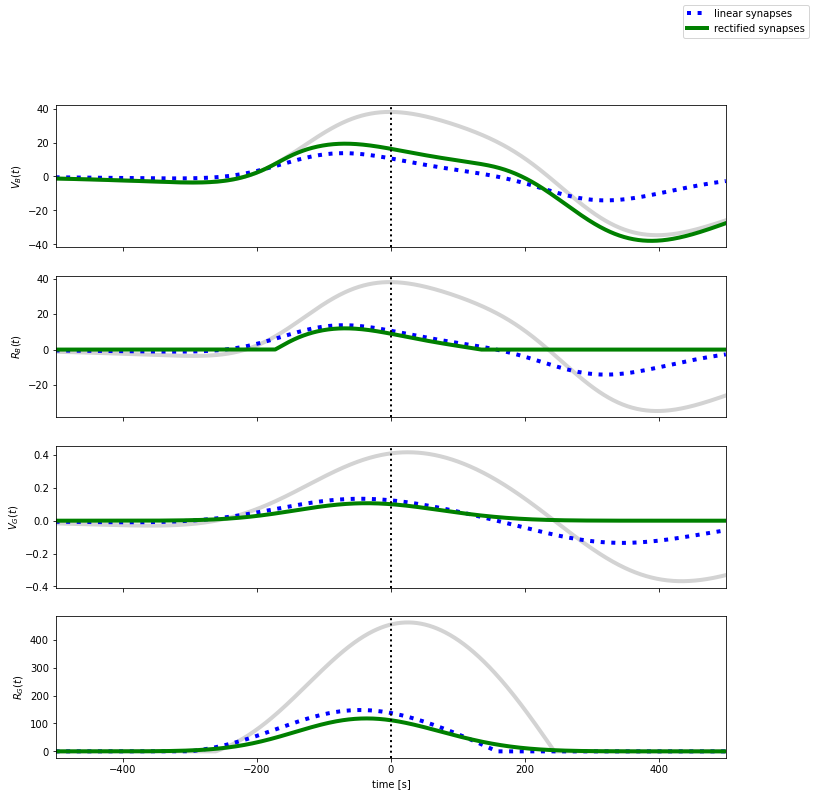

In [10]:
lw = 4
c1 = 'green'
c2 = 'blue'


fig,ax = plt.subplots(4,1,  figsize = (12,12), sharex = 'col', sharey = 'row')



ax[0].plot(data4[1][0],outdp7['VB'][50,:], color = 'lightgrey', linewidth = lw)
ax[0].plot(data4[1][0],outd7['VB'][50,:], color = c2, linewidth = lw, linestyle = ':', label = 'linear synapses')

ax[1].plot(data4[1][0],outdp7['RB'][50,:], color = 'lightgrey', linewidth = lw)
ax[1].plot(data4[1][0], outd7['RB'][50,:], color = c2, linewidth = lw, linestyle = ':')


ax[2].plot(data4[1][0],outdp7['VG'][:], color = 'lightgrey', linewidth = lw)
ax[2].plot(data4[1][0],outd7['VG'][:], color = c2, linewidth = lw, linestyle = ':')

ax[3].plot(data4[1][0],outdp7['RG'][:], color = 'lightgrey', linewidth = lw)
ax[3].plot(data4[1][0], outd7['RG'][:], color = c2, linewidth = lw, linestyle = ':')




ax[0].set_ylabel('$V_{B}(t)$')
#ax[0].plot(data4[1][0],outdp8['VB'][50,:], color = 'lightgrey', linewidth = lw)
ax[0].plot(data4[1][0],outd8['VB'][50,:], color = c1, linewidth = lw, label = 'rectified synapses')

ax[1].set_ylabel('$R_{B}(t)$')
#ax[1].plot(data4[1][0],outdp8['RB'][50,:], color = 'lightgrey', linewidth = lw)
ax[1].plot(data4[1][0], outd8['RB'][50,:], color = c1, linewidth = lw)

#ax[2,0].plot(data[1][0],outd['RB'][300,:]- outdp['RB'][300,:], color = 'green', linestyle = ':')

ax[2].set_ylabel('$V_{G}(t)$')
#ax[2].plot(data4[1][0],outdp8['VG'][:], color = 'grey')
ax[2].plot(data4[1][0], outd8['VG'][:], color = c1, linewidth = lw)

ax[3].set_ylabel('$R_{G}(t)$')
#ax[3].plot(data4[1][0],outdp8['RG'][:], color = 'grey')
ax[3].plot(data4[1][0], outd8['RG'][:], color = c1, linewidth = lw)



ax[0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[2].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[3].axvline(0,linestyle = ':', color = 'k', linewidth =2 )


ax[-1].set_xlabel ('time [s]')
ax[-1].set_xlim(-500,500)

fig.legend()



In [11]:
ax[0]

<AxesSubplot:ylabel='$V_{B}(t)$'>